In [1]:
"""
Name: con_realistic_example.ipynb
Authors: Stephan Meighen-Berger
Example of the realistic simulations that can be done
"""

'\nName: con_realistic_example.ipynb\nAuthors: Stephan Meighen-Berger\nExample of the realistic simulations that can be done\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Adding path to module
sys.path.append("../core/")

In [5]:
# Module imports
from contagion import CONTAGION
from con_config import config

In [6]:
# Creating a fourth_day object
infected=10
contagion = CONTAGION(infected, config=config)

In [7]:
# Storing the solutions
results = contagion.sim()

In [8]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.

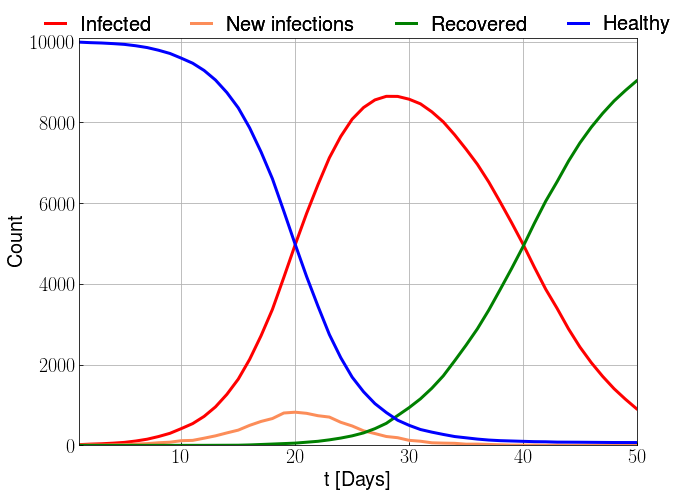

In [9]:
# Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
ax.plot(contagion.t, contagion.mc_run.infections,
        lw=lw, label='Infected', color='r')
ax.plot(contagion.t, contagion.mc_run.new_infections,
        lw=lw, label='New infections', color=colors[1])
ax.plot(contagion.t, contagion.mc_run.immune,
        lw=lw, label='Recovered', color='g')
ax.plot(contagion.t, config['population size'] - np.cumsum(contagion.mc_run.new_infections),
        lw=lw, label='Healthy', color='b')
ax.set_xlim(1e0, 50)
ax.set_ylim(0., config['population size'] * 1.01)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Count', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.1),
                 ncol=4, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.show()

In [11]:
figure.savefig("C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Corona\\Contagion_Example.png",
               bbox_inches='tight')